In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещённую и несмещённую оценки дисперсии для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
array1 = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

**cреднее арифметическое**

In [3]:
mean = array1.sum() / array1.size
mean

65.3

In [4]:
## проверка
array1.mean()

65.3

**среднее квадратичное отклонение**

In [5]:
std = 0
for i in array1:
    temp = (i - array1.mean()) ** 2
    std = std + temp
std = std / array1.size
np.sqrt(std)

30.823854398825596

In [6]:
## проверка
array1.std(ddof=0)

30.823854398825596

**смещённая и несмещённая оценка дисперсии**

In [7]:
## смещенная оценка
v = 0
for i in array1:
    temp = (i - array1.mean()) ** 2
    v = v + temp
v = v / array1.size
v

950.11

In [8]:
# проверка
array1.var(ddof=0)

950.11

In [9]:
## несмещённая оценка
v1 = 0
for i in array1:
    temp = (i - array1.mean()) ** 2
    v1 = v1 + temp
v1 = v1 / (array1.size - 1) 
v1

1000.1157894736842

In [10]:
# проверка
array1.var(ddof=1)

1000.1157894736842

### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot.

В этой задаче также нельзя использовать статистические функции. Неоднозначности в вычислении квантилей можно разрешать любым способом.

In [11]:
array2 = pd.Series(array1)
sortedArr = sorted(array2)
length = len(sortedArr)

**первый квартиль**

In [12]:
sortedArr[length // 4 - 2 : length // 4 + 2]

[30, 33, 45, 55]

In [13]:
# ответ находится между 33 и 45

In [14]:
# проверка
array2.quantile(0.25)

42.0

**третий квартиль**

In [15]:
sortedArr[length * 3 // 4 - 2 : length * 3 // 4 + 2]

[77, 80, 84, 89]

In [16]:
# ответ находится между 80 и 84

In [17]:
# проверка
array2.quantile(0.75)

81.0

**Интерквартильное расстояние**

In [18]:
81 - 42

39

In [19]:
# не понял как находить квартиль при поиске вручную...
# ибо ответы, которые выходят при использовании методов находятся не по середине, а со смещением

**boxplot**

{'whiskers': [<matplotlib.lines.Line2D at 0x201e14f6b00>,
 'caps': [<matplotlib.lines.Line2D at 0x201e14f6ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201e14f66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x201e150d828>],
 'fliers': [<matplotlib.lines.Line2D at 0x201e150db70>],
 'means': []}

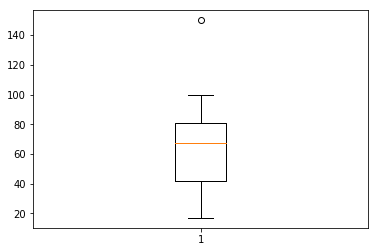

In [20]:
plt.boxplot(array2)

**ищем выборсы**

In [21]:
q1 = array2.quantile(0.25)
q3 = array2.quantile(0.75)
iqr = q3 - q1
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

In [22]:
outliers = []
for i in array2:
    if (i < boxplot_range[0]) or (i > boxplot_range[1]):
        outliers.append(i)
outliers

[150]

### Задача 3

Для распределения Пуассона с параметром a = 5 найти теоретические (т.е. используя закон распределения, а не выборку) мат. ожидание, моду и медиану.

Не знаю, это проверка на внимательность или нет, но для *распределение Пуассона* справедливо следующие:

$$M(X) = D(X) = a.$$

Из этого получаем:

$$M(X) = 5$$

Для нахождения моды и медианы используем формулу:

$$P(X = k) = \dfrac{a^k e ^{-a}}{k!}.$$

In [23]:
P = []
K = []
def pausson(a, k):
    for i in range(0, k):
        temp = (a ** i) * (np.exp(-a)) / np.math.factorial(i)
        P.append(temp)
        K.append(i)
    plt.plot(K,P)

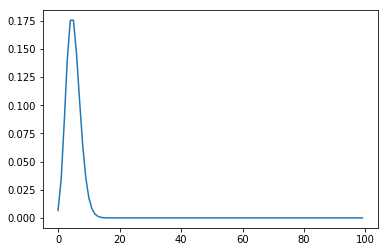

In [24]:
pausson(5, 100)

In [25]:
array3 = pd.Series(P)
print("Мода =", array3.mode())
print("Медиана =", array3.median())

Мода = 0    0.175467
dtype: float64
Медиана = 1.0822201710533284e-31


In [26]:
# не уверен, что это корректное решение, но я не додумался как найти моду и медиану без построения ряда

### Задача 4

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

**Решение**

Событием **𝐴** будем считать сдачу сессии

Исходя из условия имеем **априорные** вероятности(считая что у всех студентов всех факультетов равные шансы):

$$B_1 = \frac{1}{4}$$

$$B_2 = \frac{1}{4}$$

$$B_3 = \frac{2}{4}$$

Имея вероятности в условии получаем **апостериорные** вероятности:

$$P(A\:|\:B_1) = 0.8$$

$$P(A\:|\:B_2) = 0.7$$

$$P(A\:|\:B_3) = 0.9$$

Искомые вероятности будем находить по формуле:

$$P(B_i\:|\:A) = \frac{P(B_i) \cdot P(A\:|\:B_i)}{P(A)}$$

In [27]:
A = ((1/4) * 0.8) + ((1/4) * 0.7) + ((2/4) * 0.9)
def countP(B, A_B):
    return (B * A_B)/ A

Вероятность того, что сессию сдал студент с факультета **А**:

In [28]:
countP(0.25, 0.8)

0.24242424242424246

Вероятность того, что сессию сдал студент с факультета **B**:

In [29]:
countP(0.25, 0.7)

0.21212121212121213

Вероятность того, что сессию сдал студент с факультета **C**:

In [30]:
countP(0.5, 0.9)

0.5454545454545455